# Разведочный анализ данных

Разведочный анализ данных (exploratory data analysis, EDA) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

В этом ноутбке мы рассмотрим базовый анализ данных на примере учебного датасета про вино. Для его загрузки мы воспользуемся функционалом популярной библиотеки [Scikit-learn](https://scikit-learn.org/stable/). Прочитать про сам датасет можно [здесь](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).    

Как-либо обрабатывать данные на основе проведенного анализа мы будем уже на следующих занятиях – сегодня мы только знакомимся с основными инструментами и правилами EDA.

### Импортируем библиотеки, настраиваем ноутбук

In [1]:
import pandas as pd # для анализа, обработки и преобразования данных в табличном виде
import numpy as np # для эффективных математических вычислений и работы с многомерными массивами
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # для построения информативных и наглядных графиков

from sklearn.datasets import load_wine # для загрузки датасета

Все перечисленные выше библиотеки -- необходимая база для дальнейшей работы. Будет очень полезно внимательно изуичить документацию (и возможности) каждой из них:    


*   Документация [pandas](https://pandas.pydata.org/docs/)  
*   Документация [numpy](https://numpy.org/doc/2.3/)  
*   Документация [matplotlib](https://matplotlib.org/stable/plot_types/index.html)
*   Документация [seaborn](https://seaborn.pydata.org/)

### Загрузим учебный датасет и сохраним его в формате, в котором удобно делать EDA

In [2]:
# загружаем датасет
data = load_wine(as_frame=True)

# извлекаем данные и сохраняем их как pandas.DataFrame
df = data.frame

### Изучим датасет
На этом этапе мы смотрим, что у нас вообще в данных, анализируем их объем, полноту и характеристики

In [3]:
# посмотрим на датасет
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
# можем посмотреть первые строчки датасета
df.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [5]:
# или последние
df.tail(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [6]:
# или случайные n строчек
df.sample(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,1
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2


In [7]:
# можем вывести список колонок
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [8]:
# Наша целевая переменная -- это класс вина.
# Посмотрим, сколько у нас классов
df['target'].unique()

array([0, 1, 2])

In [9]:
# альтернативный способ
df.target.unique()

array([0, 1, 2])

In [10]:
# посмотрим на информацию о датасете: количество строк и столбцов, названия признаков,
# типы данных, количество непустых значений и объем памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [11]:
# можем коротко вывести информацию о количестве объектов и признаков (строк и столбцов)
df.shape

(178, 14)

In [12]:
# можем посмотреть на числовые характеристики: количество, среднее, стандартное отклонение,
# минимальное значение, 25-й перцентиль, медиана, 75-й перцентиль и максимальное значение
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [13]:
# можем вывести в более удобном формате. Что мы можем сказать о данных по этой таблице?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [14]:
# еще раз убедимся, что нет пропущенных значений
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [15]:
# можем вывести кратко
df.isnull().sum().sum()

np.int64(0)

In [16]:
# дубликаты в данных могут негативно влиять на качество обучения. Проверим, нет ли их!
df.duplicated().sum()

np.int64(0)

### Важно понимать, как связаны (скоррелированы) между собой признаки и целевая переменная

Сначала посмотрим на распределение каждого отдельного признака

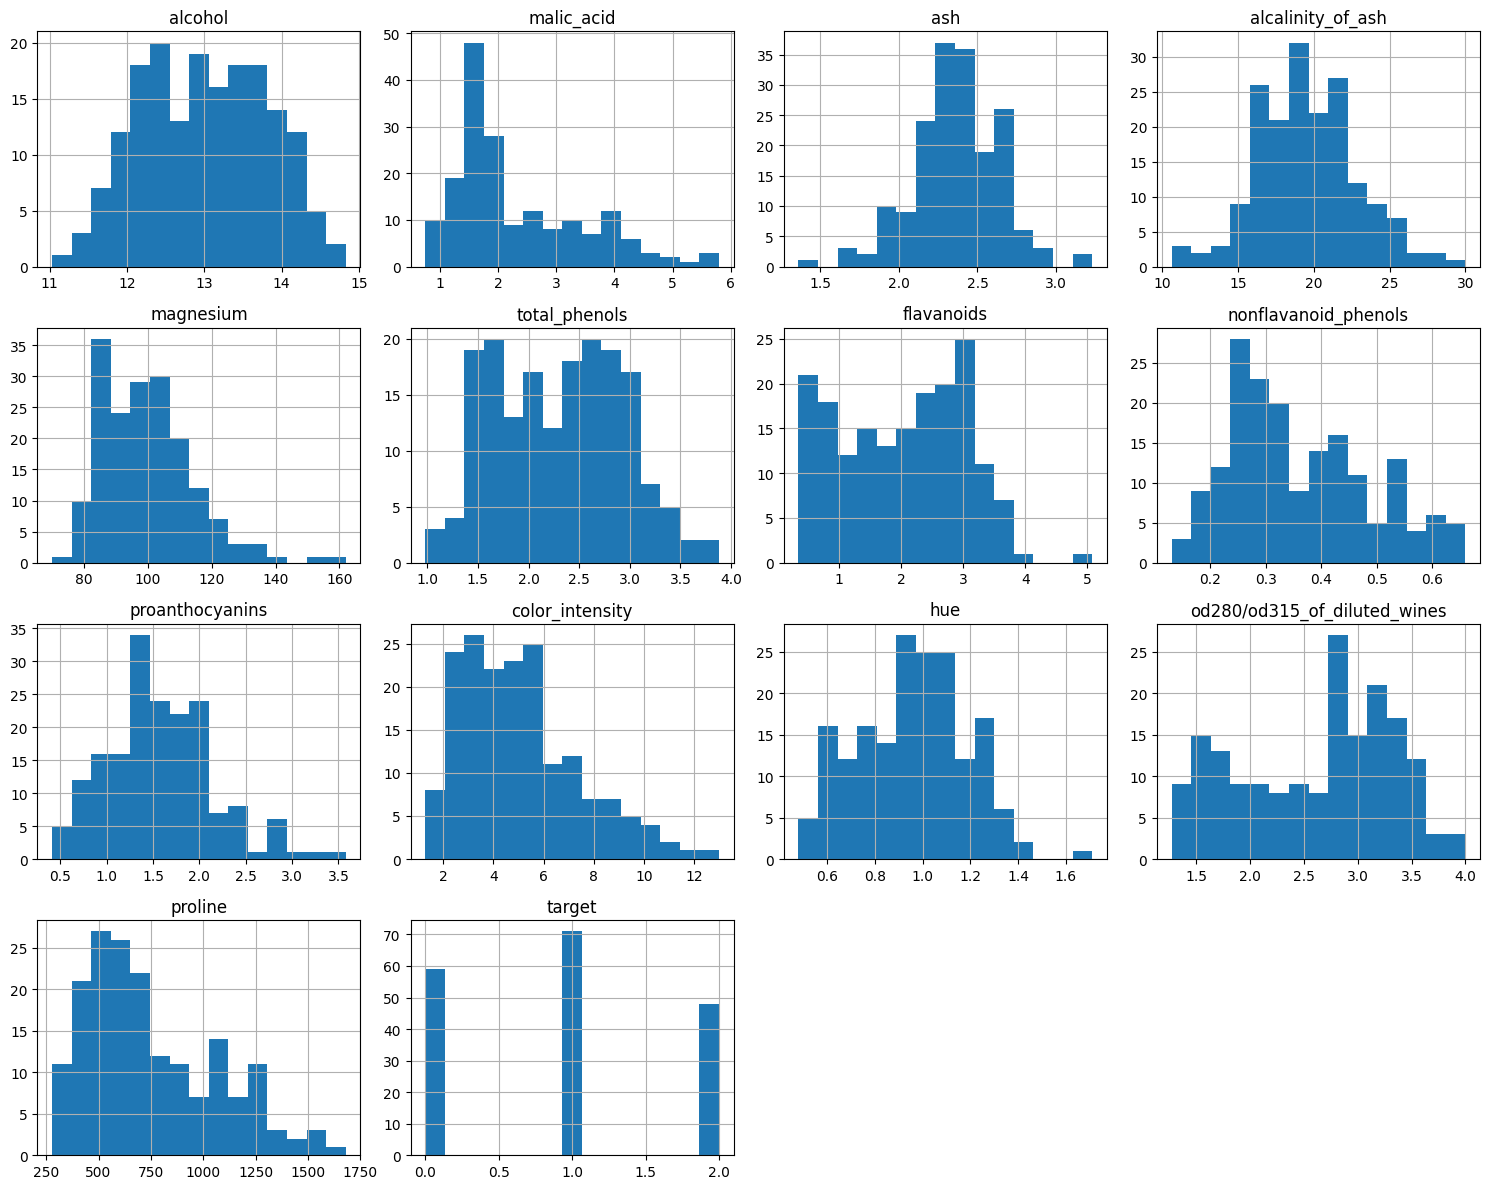

In [17]:
df.hist(bins=15, figsize=(15, 12)) # построим диаграмму распределения каждого признака
plt.tight_layout() # подгоняем расположение элементов
plt.show() # отображаем график

Можем отдельно посмотреть распределение целевой переменной. Сбалансировано ли оно в нашем случае? Почему это важно?

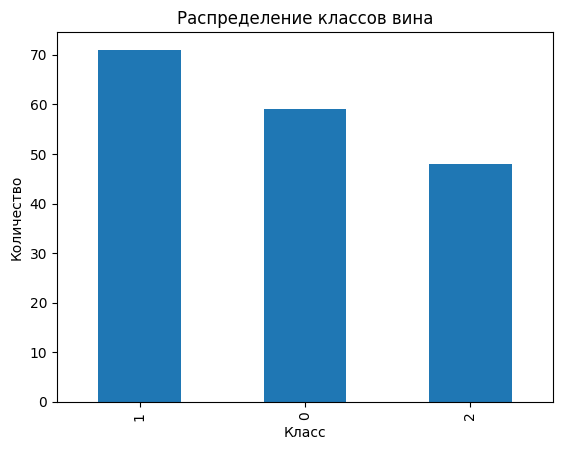

In [18]:
df.target.value_counts().plot(kind='bar') # столбчатая диаграмма распределения количества объектов по классам
plt.title('Распределение классов вина')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


Построим матрицу корреляции признаков

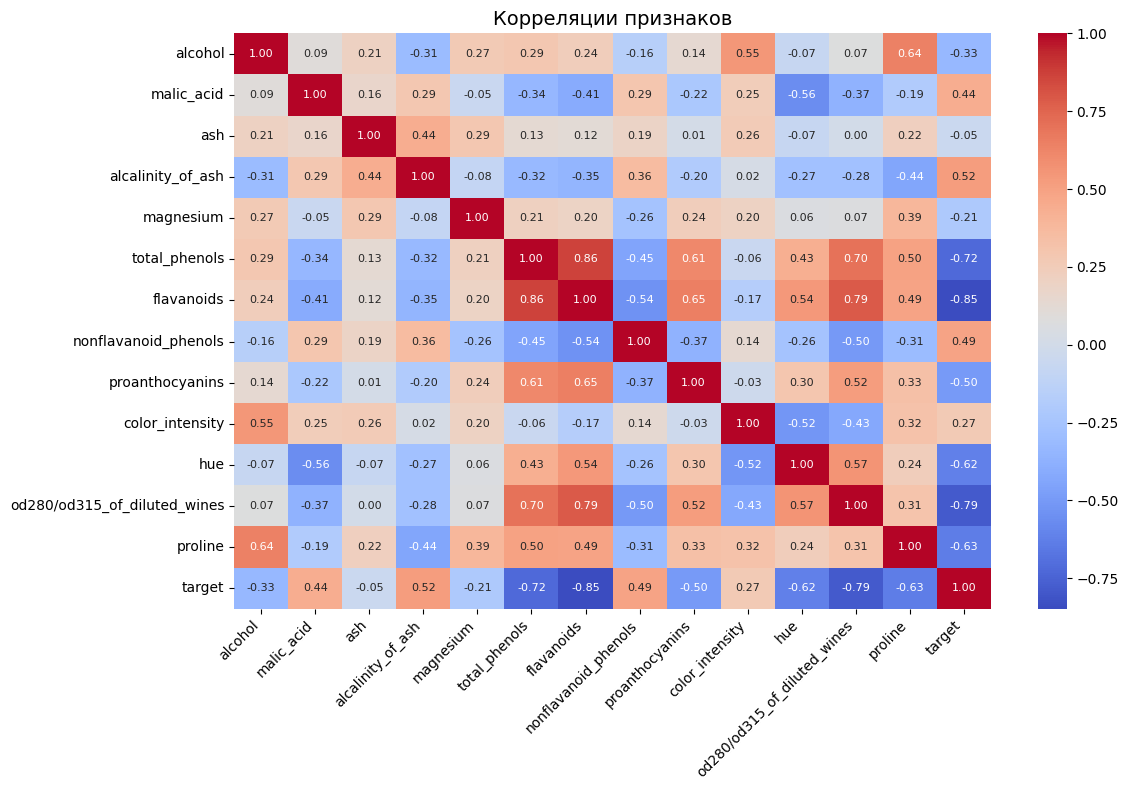

In [19]:
plt.figure(figsize=(12, 8))  # увеличиваем размер графика, так как признаков довольно много

corr = df.corr()             # строим матрицу корреляций

sns.heatmap(
    corr,
    annot=True,              # показываем значения
    fmt='.2f',               # 2 знака после запятой
    cmap='coolwarm',         # цветовая схема
    annot_kws={'size': 8}    # размер шрифта аннотаций
)

plt.title('Корреляции признаков', fontsize=14)
plt.xticks(rotation=45, ha='right')  # поворот подписей по X
plt.yticks(rotation=0)               # подписи по Y горизонтально
plt.tight_layout()
plt.show();

In [20]:
# можем вывести матрицу корреляций
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Посмотрим разные графики зависимости таргета от признаков

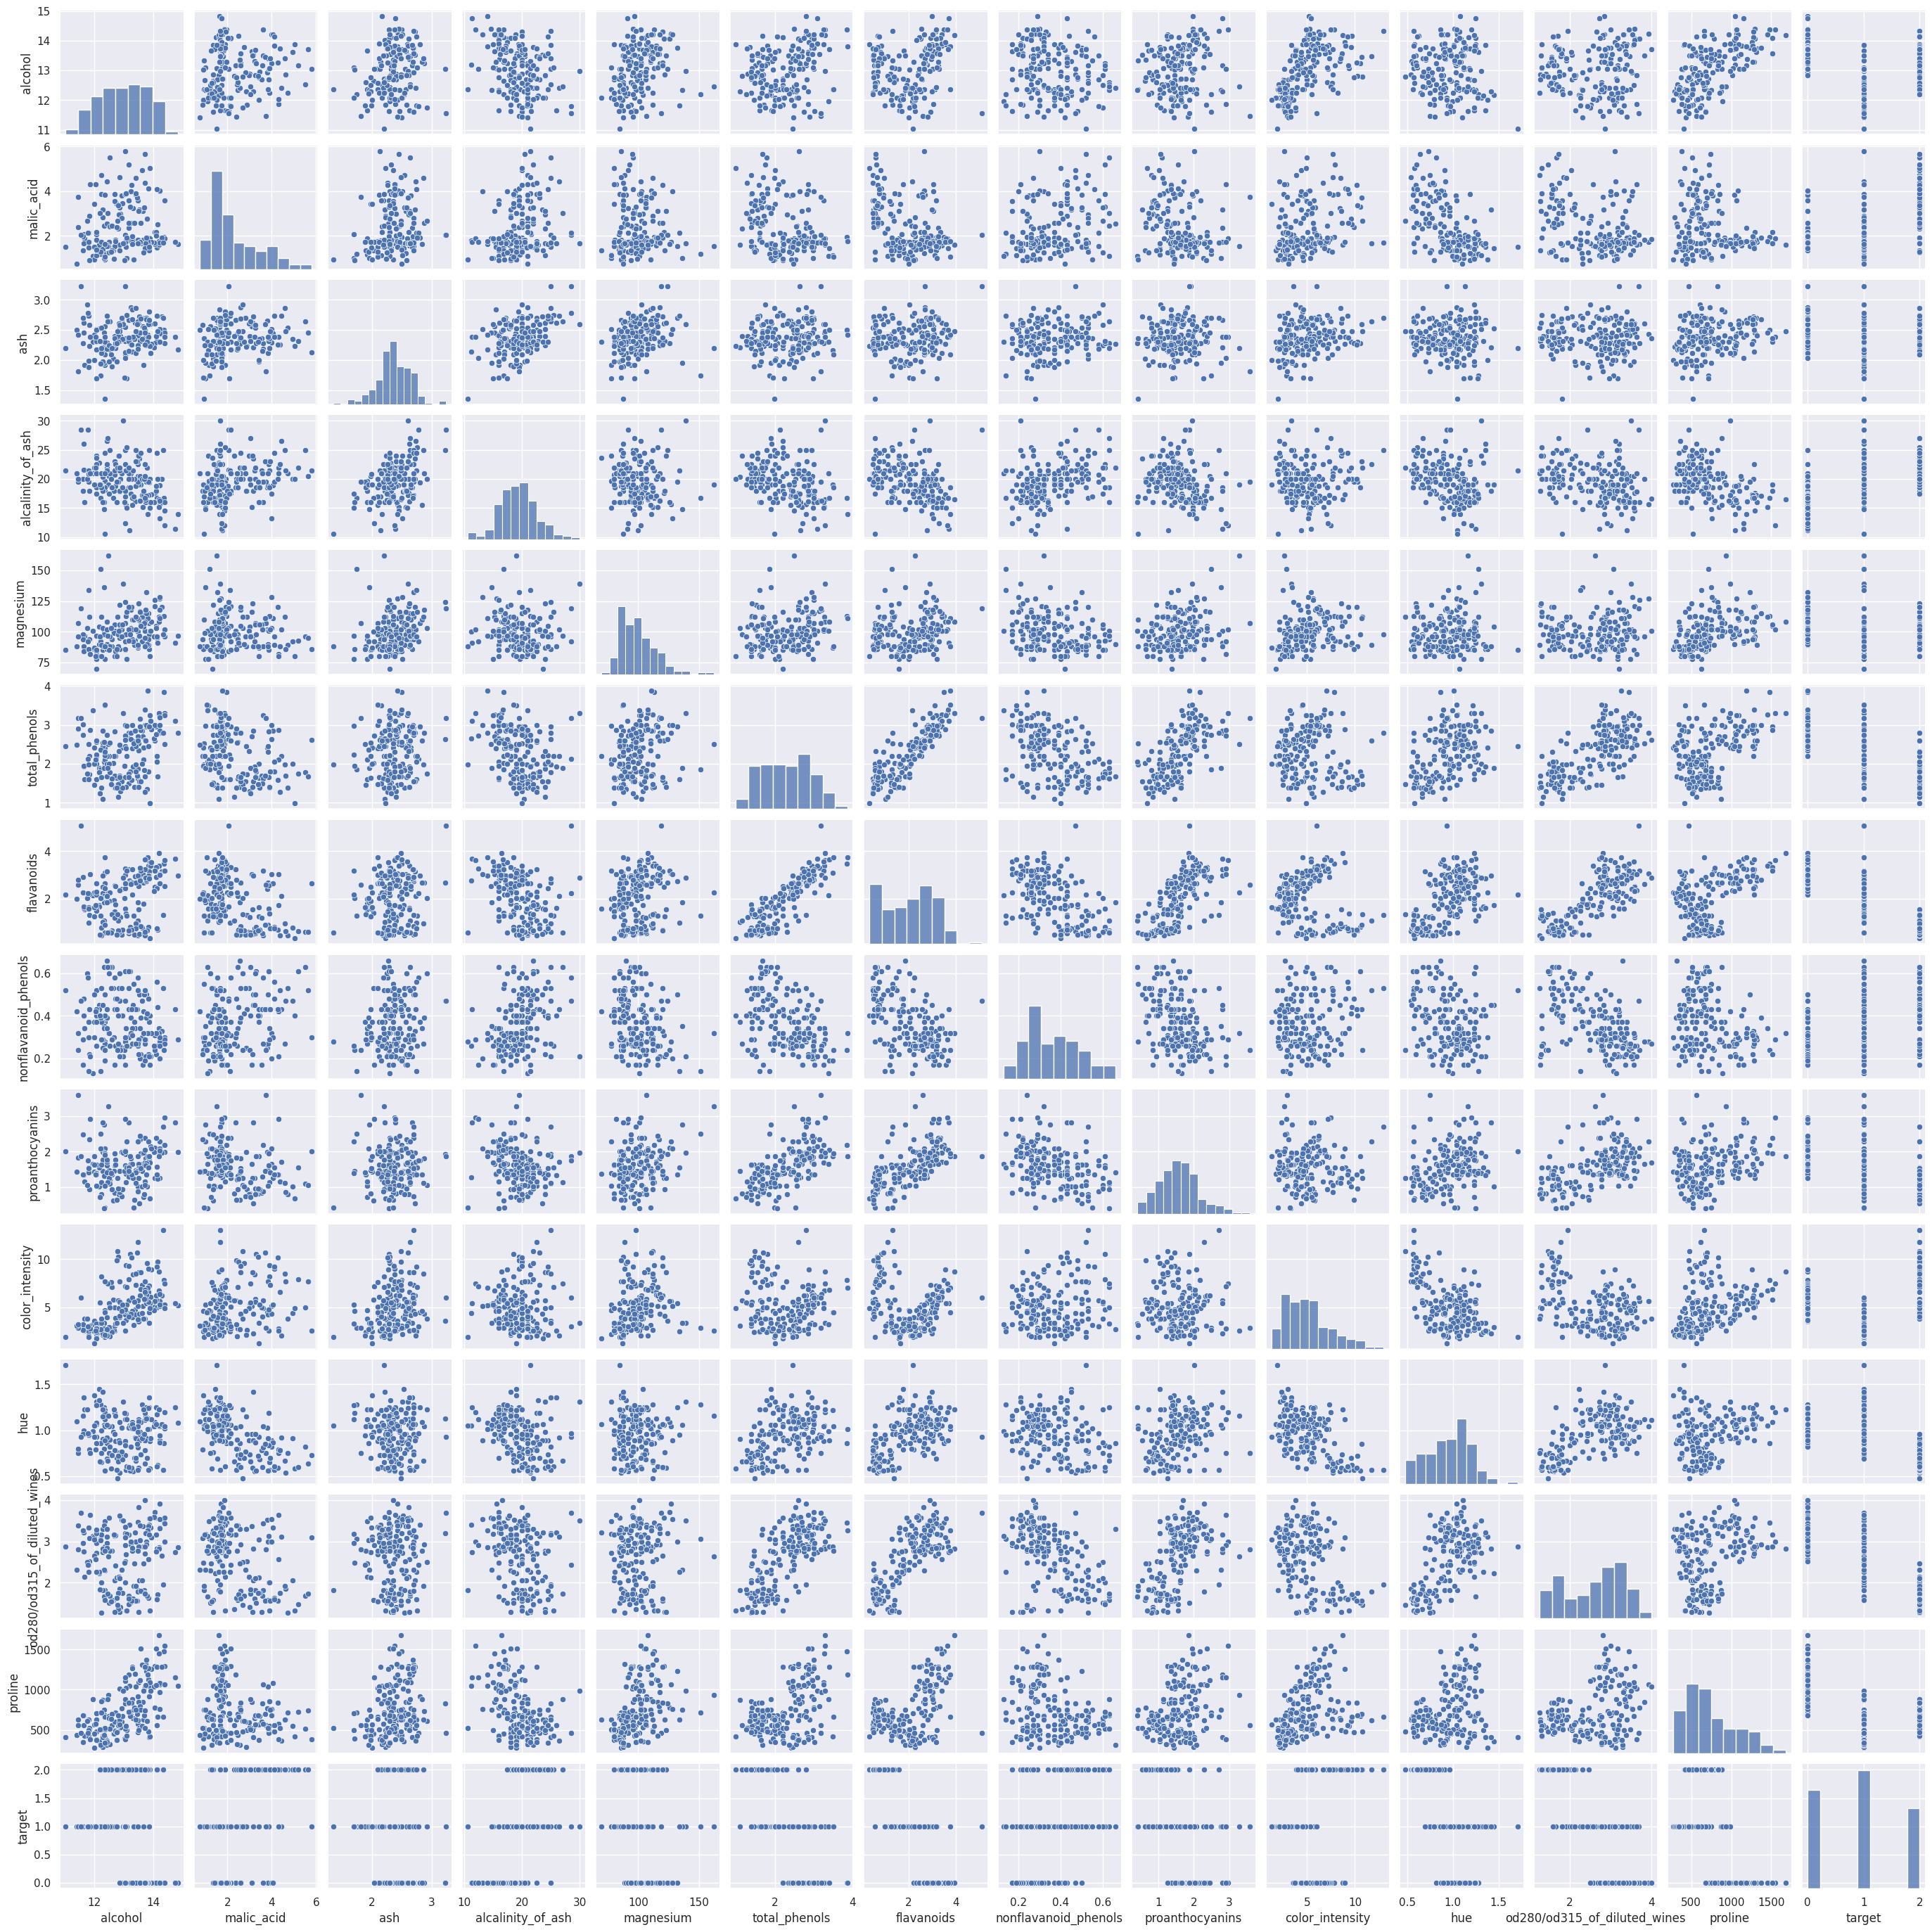

In [21]:
# можем вывести все возможные попарные графики распределений
sns.set()
sns.pairplot(df, height=2)
plt.show();

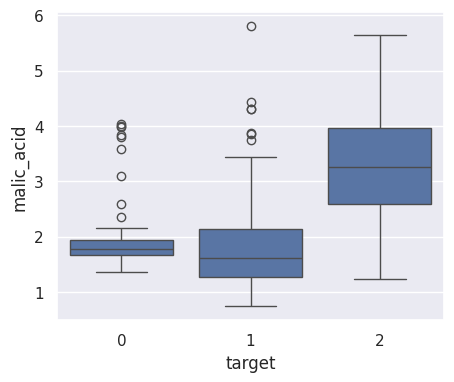

In [22]:
# можем дальше рассматривать разные графики по каждой отдельно взятой паре
plt.figure(figsize=(5, 4))
sns.boxplot(x='target', y='malic_acid', data=df, orientation='vertical')
plt.xlabel('target')
plt.ylabel('malic_acid')
plt.show();

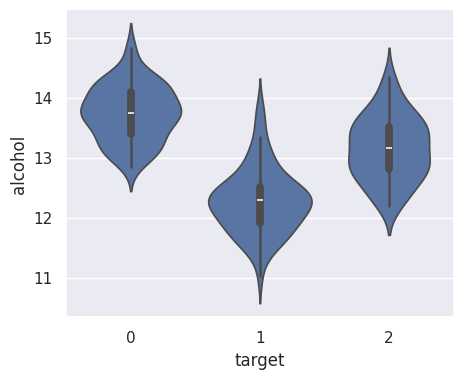

In [23]:
plt.figure(figsize=(5, 4))
sns.violinplot(x='target', y='alcohol', data=df)
plt.xlabel('target')
plt.ylabel('alcohol')
plt.show();

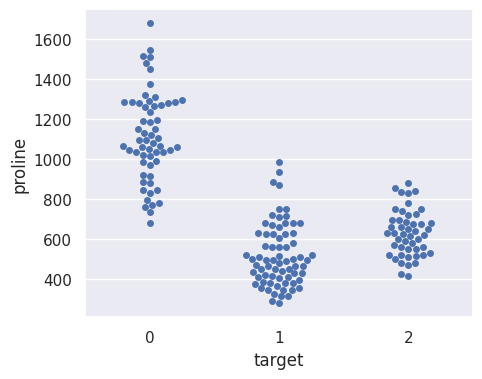

In [24]:
plt.figure(figsize=(5, 4))
sns.swarmplot(x='target', y='proline', data=df, size=5)
plt.xlabel('target')
plt.ylabel('proline')
plt.show();

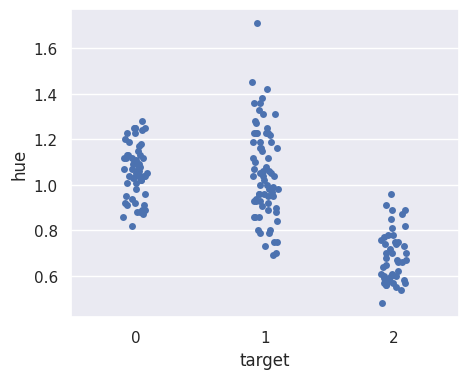

In [25]:
plt.figure(figsize=(5, 4))
sns.stripplot(x='target', y='hue', data=df)
plt.xlabel('target')
plt.ylabel('hue')
plt.show();

### AutoEDA: YData Profiling

Существуют библиотки, позволяющие уменьшить количество ручной работы при EDA.

Сегодня посмотрим на YData Profiling ([документация](https://docs.profiling.ydata.ai/latest/)).

In [26]:
%%capture

!pip install ydata-profiling -U

In [27]:
from ydata_profiling import ProfileReport

In [28]:
# YData Profiling
profile = ProfileReport(df, title="Wine dataset Report", explorative=True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.